## Import relevant libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from math import factorial
import numpy as np
import scipy.io
import scipy.signal
import sys

## Locating Region Of Interest (ROI) and segmenting the traces
- Manually identify a few ROI (must correspond to same bit)
- Determine a threshold value, maximum tolerance deviation for each point, using these traces
    - Threshold needs to be larger than the max diff observed
    - but lower than difference for other non-ROI subtraces
- Use one manually identified ROI with threshold values to identify other ROI, segmenting the graph

## We will be using a simple sample ROI that was provided by the researchers for this demo

- Both ROI are running RSA (traditional)
- One of the ROI corresponds to bit 0, the other corresponds to bit 1

In [10]:
df0 = np.load('pattern_0.npy')
df1 = np.load('pattern_1.npy')


## Overlaying of the 2 traces

-  Notice that while most of the trace remain relatively the same, there are certain points whereby the traces deviate from each other

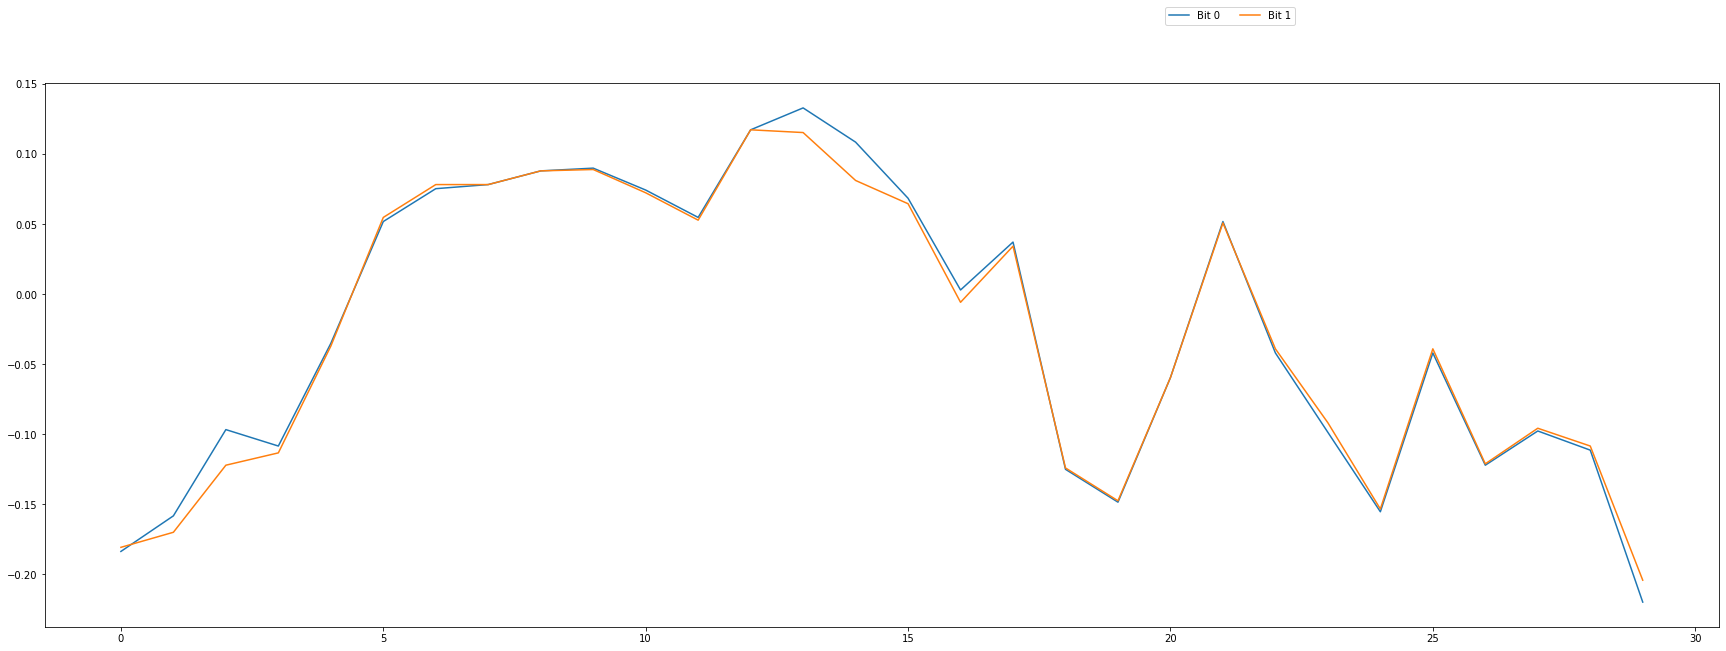

In [29]:
plt.figure(figsize=(30,10))
plt.plot(df0, label = 'Bit 0')
plt.plot(df1, label = 'Bit 1')
plt.legend(bbox_to_anchor=(0.75, 1.15), ncol=2)

## Find the Point Of Interest (POI) Threshold

In [24]:
power_diff = []

# Calculate power difference between traces
for i in range(len(df0)):
    power_diff.append(abs(df0[i] - df1[i]))

    
# Find out the maximum difference for the points in the graph and note the index
max = 0
index = 0
for i in range(len(power_diff)):
    if power_diff[i] > max:
        max = power_diff[i]
        index = i
    #print(power_diff[i])
print(f"Max: {max}")
print(f"Index: {index}")
 
# Calculate the threshold
threshold = df0[index] + (power_diff[index] / 2)
print(f"Threshold at point {index} is {threshold}")

print(f"Traces at point 14 that are above this threshold will be classified as bit 0.")
print(f"Traces at point 14 that are below this threshold will be classified as bit 1.")

Max: 0.02734375
Index: 14
Threshold at point 14 is 0.1220703125
Traces at point 14 that are above this threshold will be classified as bit 0.
Traces at point 14 that are below this threshold will be classified as bit 1.


## Recovery of decryption key, d
- After segmenting and identifying POI, recovering of d is trivial. 
- Loop over all the segments, compare the POI, and reconstruct the decryption key from there
- Below is an example pseudocode that can be used to construct the decryption key

In [ ]:
# Pseudocode here
d = 0

for segments in trace:                  # Loop through all the segments in the trace
    d = d << 1
    if segment[index] < threshold:      # If point 14 of the segment is below threshold, its classified as bit 1
        d = d | 1

print(f"Decryption key is {d}")         # Print out decryption key